In [13]:
%matplotlib inline
import sys
sys.path.insert(0, '../../../')
sys.path.insert(0, '../../../NeuralNetwork_HRTEM')


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from temnn.loaddata import load_training
from temnn.data.dataset import DataEntry,DataSet
from glob import glob

from ase.visualize import view
from ase.visualize.plot import plot_atoms

In [21]:
def load_training(data_dir, asefile='.traj'):
    "Load data folder."
    print("Data source:", data_dir)
    waves=sorted(glob(data_dir+"wave/wave_*"))
    points=sorted(glob(data_dir+"points/points_*.npz"))
    models=sorted(glob(data_dir+"model/model_*"+asefile))
    entries = [DataEntry(wave=w, points=p, model=m) for w,p,m in zip(waves,points,models)]
    if not len(entries):
        raise ValueError("The dataset appears to be empty!")
    print("Loaded {} configurations.".format(len(entries)))
    return DataSet(entries)

In [24]:
# data = load_training('/home/niflheim2/mhlla/hrid/simulation_data/Au_fcc_mixed/')
data = load_training('/home/niflheim2/mhlla/hrid/simulation_data/MoS2_dankelly_atomicseg/')

Data source: /home/niflheim2/mhlla/hrid/simulation_data/MoS2_dankelly_atomicseg/
Loaded 1000 configurations.


In [35]:
d = data.next_batch(1)[0]
d.load()
d._model

Atoms(symbols='Mo314S601', pbc=[True, True, False], cell=[102.4, 102.4, 6.377153295164073])

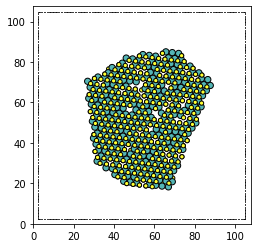

In [36]:
atoms = d._model.copy()
atoms.rotate(180, 'x', center='COU')
plot_atoms(atoms)
plt.show()
# view(atoms)

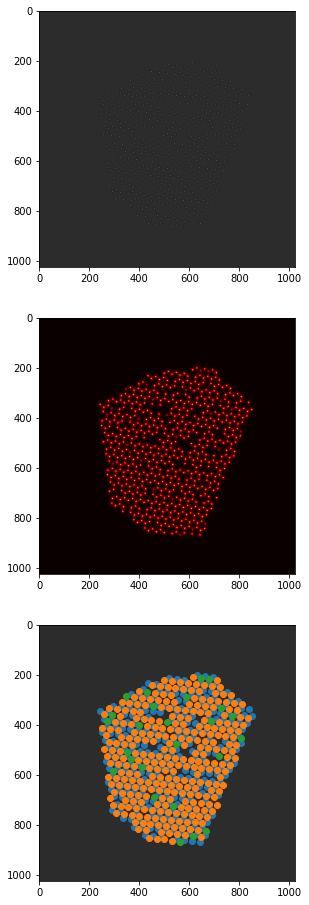

In [37]:
# Get the atomic positions
sampling = d._wave.sampling
points = d._sites / sampling

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(6,16))
wave = d._wave.array.T
ax1.imshow(np.abs(wave), cmap='gray')
ax2.imshow(np.angle(wave) + np.pi, cmap='hot')
ax3.imshow(np.abs(wave), cmap='gray')
for i in sorted(np.unique(d._classes)):
    p = points[d._classes == i]
    ax3.scatter(p[:,0], p[:,1])